In [1]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import re
from sklearn import metrics
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [7]:
dataset=pd.read_csv('twitter.csv')

In [8]:
dataset.head()

,tweet
0,when modi promised “minimum government maximum...
1,talk all the nonsense and continue all the dra...
2,what did just say vote for modi welcome bjp t...
3,asking his supporters prefix chowkidar their n...
4,answer who among these the most powerful world...


In [9]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

dataset['Subjectivity']=dataset['tweet'].apply(getSubjectivity)
dataset['Polarity']=dataset['tweet'].apply(getPolarity)
dataset

,tweet,Subjectivity,Polarity
0,when modi promised “minimum government maximum...,0.700000,-0.300000
1,talk all the nonsense and continue all the dra...,0.000000,0.000000
2,what did just say vote for modi welcome bjp t...,0.616667,0.483333
3,asking his supporters prefix chowkidar their n...,0.658333,0.150000
4,answer who among these the most powerful world...,0.750000,0.400000
...,...,...,...
993,modis rise incredibly inspirational its remind...,0.857639,0.177083
994,another meltdown india which will further rejo...,0.513889,0.069444
995,there are two reasons for atmosphere hatred cr...,0.000000,0.000000
996,modi has wiped out the small micro industries ...,0.400000,-0.250000


In [10]:
def cleanTxt(text):
    text=re.sub(r'@[A-Za-z0-9]+','',text)
    text=re.sub(r'#','',text)
    text=re.sub(r'RT[\s]+','',text)
    text=re.sub(r'https?:\/\/\S+','',text)
    
    return text
dataset['tweet']=dataset['tweet'].apply(cleanTxt)
dataset

,tweet,Subjectivity,Polarity
0,when modi promised “minimum government maximum...,0.700000,-0.300000
1,talk all the nonsense and continue all the dra...,0.000000,0.000000
2,what did just say vote for modi welcome bjp t...,0.616667,0.483333
3,asking his supporters prefix chowkidar their n...,0.658333,0.150000
4,answer who among these the most powerful world...,0.750000,0.400000
...,...,...,...
993,modis rise incredibly inspirational its remind...,0.857639,0.177083
994,another meltdown india which will further rejo...,0.513889,0.069444
995,there are two reasons for atmosphere hatred cr...,0.000000,0.000000
996,modi has wiped out the small micro industries ...,0.400000,-0.250000


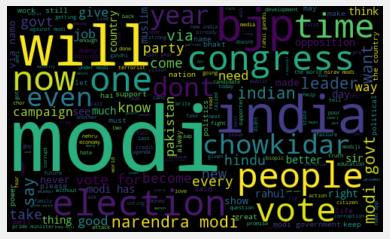

In [13]:
allWords=''.join([twts for twts in dataset['tweet']])
wordCloud=WordCloud(width=500,height=300,random_state=21,max_font_size=119).generate(allWords)
plt.imshow(wordCloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [14]:
def getAnalysis(score):
    if score<0:
        return 'Negative'
    elif score==0:
        return 'Neutral'
    else:
        return 'Positive'
    
dataset['Analysis']=dataset['Polarity'].apply(getAnalysis)
dataset

,tweet,Subjectivity,Polarity,Analysis
0,when modi promised “minimum government maximum...,0.700000,-0.300000,Negative
1,talk all the nonsense and continue all the dra...,0.000000,0.000000,Neutral
2,what did just say vote for modi welcome bjp t...,0.616667,0.483333,Positive
3,asking his supporters prefix chowkidar their n...,0.658333,0.150000,Positive
4,answer who among these the most powerful world...,0.750000,0.400000,Positive
...,...,...,...,...
993,modis rise incredibly inspirational its remind...,0.857639,0.177083,Positive
994,another meltdown india which will further rejo...,0.513889,0.069444,Positive
995,there are two reasons for atmosphere hatred cr...,0.000000,0.000000,Neutral
996,modi has wiped out the small micro industries ...,0.400000,-0.250000,Negative


In [15]:
#print all the positive tweets
j=1
sortedDF=dataset.sort_values(by=['Polarity'])
for i in range(0,sortedDF.shape[0]):
    if(sortedDF['Analysis'][i]=='Positive'):
        print(str(j) +')' + sortedDF['tweet'][i])
        print()
        j=j+1


1)what did just say vote for modi  welcome bjp told you rahul the main campaigner for modi think modi should just relax

2)asking his supporters prefix chowkidar their names modi did great service now there confusion what read what not now crustal clear what will crass filthy nonsensical see how most abuses are coming from chowkidars

3)answer who among these the most powerful world leader today trump putin modi may 

4)with upcoming election india saga going important pair look current modi leads govt elected with deal brexit combination this weekly looks juicy bears imho 

5)gandhi was gay does modi  

6)things like demonetisation gst goods and services tax…the upper castes would sort either view favourably say that need give this more time other castes like dalits the muslims were more against because that’ just not modi’ constituency2

7)hope tuthukudi people would prefer honest well behaved nationalist courageous likly minister modi cabinet vote benifit thuthukudi 

8)calm waters 

In [16]:
#print negative tweets
j=1
sortedDF=dataset.sort_values(by=['Polarity'],ascending='False')
for i in range(0,sortedDF.shape[0]):
    if(sortedDF['Analysis'][i]=='Negative'):
        print(str(j)+')' +sortedDF['tweet'][i])
        print()
        j=j+1

1)when modi promised “minimum government maximum governance” expected him begin the difficult job reforming the state why does take years get justice state should and not business and should exit psus and temples

2)vote such party and leadershipwho can take fast and firm action none other than narendra damodardas modi and bjp party 

3)didn’ write chowkidar does mean ’ anti modi try visit the plz not all who haven’ used are anti 

4)with firm belief the leadership shri narendra modi bjp entering into politics given form file nomination for the khammam parliamentary seat proceeding khammam today 

5)sultanpur uttar pradesh loksabha candidate select pawan kumar pandey actually public want given vote modi but your current condidate not popular district your candidate bsp candidate sonbhadra singh

6)thiugh nehru not alive but still alive heart modi for every failure nehru responsible 

7)modi govts slashing indias education budget clear indicator that they dont care for indias future
con

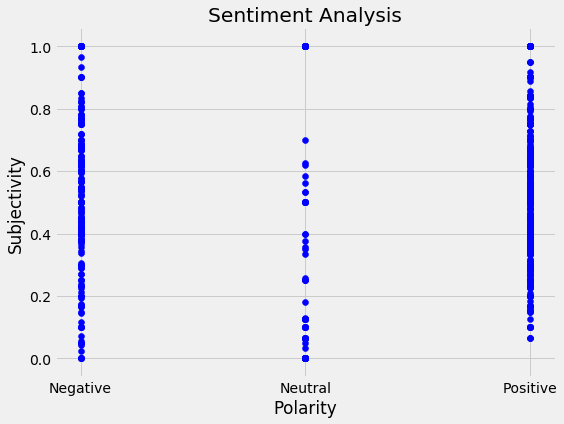

In [17]:
#plot the subjectives and polarity
plt.figure(figsize=(8,6))
for i in range(0,dataset.shape[0]):
    plt.scatter(dataset['Analysis'][i],dataset['Subjectivity'][i],color='Blue')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [18]:
 #get percentage of positive tweets 
ptweets=dataset[dataset.Analysis=='Positive']
ptweets=ptweets['tweet']
p=round((ptweets.shape[0]/dataset.shape[0])*100,1)
p

44.2

In [19]:
#percentage of negative tweets
ptweets=dataset[dataset.Analysis=='Negative']
ptweets=ptweets['tweet']
ne=round((ptweets.shape[0]/dataset.shape[0])*100,1)
ne

22.4

In [20]:
#percentage of neutral tweets
ptweets=dataset[dataset.Analysis=='Neutral']
ptweets=ptweets['tweet']
nu=round((ptweets.shape[0]/dataset.shape[0])*100,1)
nu

33.4

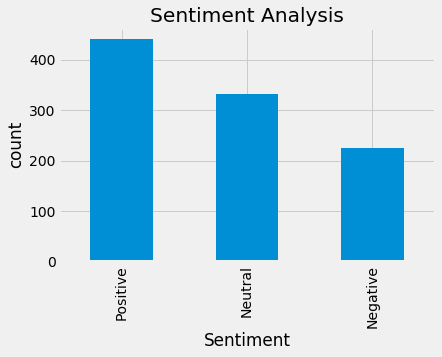

In [21]:
#show the value counts
dataset['Analysis'].value_counts()
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('count')
dataset['Analysis'].value_counts().plot(kind='bar')
plt.show()


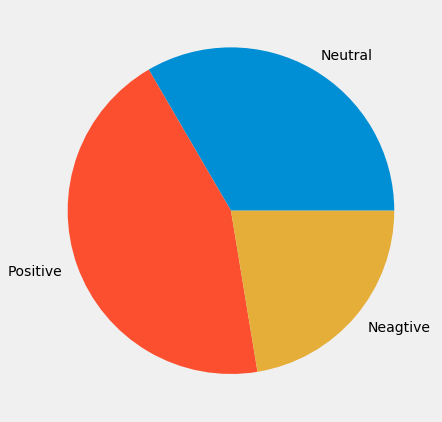

In [22]:
sentiment = ['Neutral', 'Positive', 'Neagtive'] 
  
data = [nu,p,ne] 
  
# Creating plot 
fig = plt.figure(figsize =(10, 7)) 
plt.pie(data, labels = sentiment) 
  
# show plot 
plt.show() 